<a href="https://colab.research.google.com/github/simonebugo/Big_Data/blob/main/6a_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit-Learn

 in questo lab
 vedremo ml supervisionato -> si parte da dati etichettati in cui l'obiettivo  fare predizione di queste etichette in inferenza. vedremo classificazione (predizione etichetta numerica o categorica) e regressione (predizione di un valore numerico, una quantità
).
si parte da un dataset composto da una serie di feature (colonne) e un altra colonna che rappresenta il target. chiamimo questa parte come x e il target è riferito come y.


- Scikit-Learn is a package that provides efficient versions of a large number of common ML algorithms.
- Scikit-Learn is characterized by a clean, uniform, and streamlined API, as well as by very useful and complete online documentation.
- A benefit of this uniformity is that once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is very straightforward.


## Data Representation in Scikit-Learn

- The information can be thought of as a two-dimensional numerical array, the features matrix.
- By convention, this matrix is stored in a variable named X.
- The features matrix has shape [n_samples, n_features] and is most often contained in a NumPy array or a Pandas DataFrame.
    - The samples (i.e., rows) always refer to the individual objects described by the dataset.
    - The features (i.e., columns) refer to the distinct observations that describe each sample in a quantitative manner.

## Target array
- The target array, called y,  is usually one dimensional, with length n_samples, and is generally contained in a NumPy array or Pandas Series.
- The target array may have continuous numerical values, or discrete classes/labels.
- The target array is that it is usually the quantity we want to predict from the data.




libreria scikit learn implementa diversi algoritmi di ml in python. ci sono diverse implem di algoritmo ch ono facili da usare. hanno tutte un modo standard per essere utilizzate. una volt inzializzato un algoritmo di ml e abbiamo la variabile che rappresenta l'algoritmo si possono chiamare due funzioni su questa variabile. una funziona per fare l'allenamento di ml, questa è la funzione di fit che fa l'allenamento del modello e quindi ha bisogno soltanto di x e di y per trovare corrispodnenza fra valore di feature e target. poi c'è funzione di predizione ovvero predict. nella fuznioen di predizione viene dato in input soltanto la parte delle feature, da ueste feature predict ci darà in output il target y. vediamo come applicare il modello nel dataset dei fiori. dataset fatto da 4 feature: parte di x ha 4 feature, 2 relative al sepalo e 2 al petalo (lunghezza e larghezza) il targget del dataset ovvero la y è la tupologia di fiore (ci sono 3 tipologie di fiori), sulla base dei valorei delle 4 feature l'algoritmo sarà in grado di capire di che fiore si tratta

## Scikit-Learn’s Estimator API

### Estimators objects
- An estimator is any object that learns from data
    - it may be a classification, regression or clustering algorithm or a transformer that extracts/filters useful features from raw data.
    - All estimator objects expose a fit method that takes a dataset (usually a 2-d array):
    
<tt> >>> estimator.fit(data)</tt>

- Estimator parameters: All the parameters of an estimator can be set when it is instantiated or by modifying the corresponding attribute:

<tt> >>> estimator = Estimator(param1=1, param2=2) </tt>
- Estimated parameters: When data is fitted with an estimator, parameters are estimated from the data at hand. All the estimated parameters are attributes of the estimator object ending by an underscore:
    
    <tt> >>> estimator.estimated_param_ </tt>
    
    
- All supervised estimators in scikit-learn implement a <tt>fit(X, y)</tt> method to fit the model and a <tt>predict(X)</tt> method that, given unlabeled observations <tt>X</tt>, returns the predicted labels <tt>y</tt>.

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [85]:
import sklearn as sk

In [86]:
from sklearn import datasets

In [87]:
datasets.load_iris() #dataset importato in modo particolare, non ci concentriamo su questo

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [88]:
iris = datasets.load_iris()

In [89]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [90]:
iris['target_names'] #diverse valori di target,ovvero diverse tipologie di fiore -> valore catagorico

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [91]:
iris['feature_names'] #diverse feature del dataset -> lunghezza e larghezza del sepalo in cm

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [92]:
X = iris.data #variabile con i dati. diversi fiori e per ogni fiore valori delle 4 feature.

In [93]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [94]:
X.shape #150 fiori, 4 feautre per ogni fiore

(150, 4)

In [95]:
type(X)

numpy.ndarray

In [96]:
y = iris.target #target, array fatto da 0,1,2 dovesono valori che indicano le diverse tipologie di fiori (0 prima tipologia, 1 seconda, 2 terza)

In [97]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [98]:
y.shape #la shae è di 150 elementi-> ho 150 fiori quindi ho 150 etichette. sia x che y sono array numpy quindi posso selezionare i valori come già visto

(150,)

In [99]:
X[0,:] #valori della 4 feature del primo fiore

array([5.1, 3.5, 1.4, 0.2])

In [100]:
y[0]

np.int64(0)

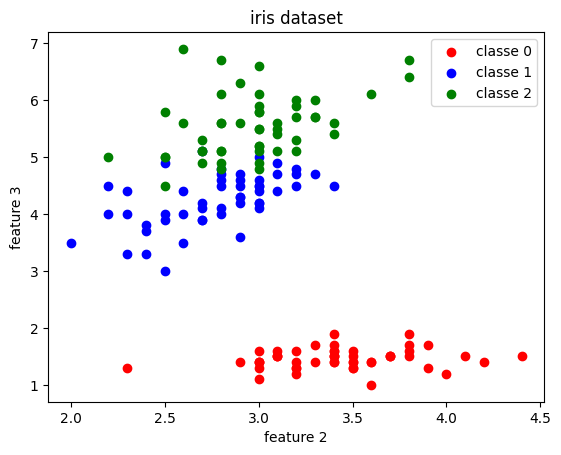

In [101]:
Xnew = X[y == 0, :]
plt.scatter(Xnew[:, 1], Xnew[:,2], c='r', label='classe 0')

Xnew = X[y == 1, :]
plt.scatter(Xnew[:, 1], Xnew[:, 2], c='b', label='classe 1')

Xnew = X[y == 2, :]
plt.scatter(Xnew[:, 1], Xnew[:, 2], c='g', label='classe 2')

plt.title('iris dataset')
plt.xlabel('feature 2')
plt.ylabel('feature 3')
plt.legend(loc='best')
#in questo plot si vedono i valori della 2 e 3 feature in uno scatteer lot, si distinguono bene le 3 diverse classi del target.
#lo scatter plot ci aiuta a vedere come si distribuiscono i valori di 2 feature sia a distinguere le diverse tipolgie di target
#per vedere se si possono distinguere dei cluster tra i questi dati -> è il caso di questo abbiamo cluster rosso molto definito
#tra gli altri 2 c'è sovrapposizione ma si distinguono comunque piuttosto bene.

### KNeighborsClassifier

come inzializzare algoritmo di ml e allenarlo su questi dati. voglio allenarlo sulle feature e vedere la tipolgoia di fiore. usiamo un KNN, algoritmo di ml che cerca di imparare la correlazione tra i daiti guardando i vicini più vicini.

In [102]:
from sklearn.neighbors import KNeighborsClassifier


In [103]:
knn = KNeighborsClassifier() #inzializzo algoritmo

In [104]:
knn

KNeighborsClassifier()

In [105]:
knn.fit(X, y) #chiamo funzione fi fit a cui passo le feature  X e il target Y. stessa lunghezza.
#algoritmo in questo modo applica funzioni matematiche per capire correlazione tra feature e target corrispondente

KNeighborsClassifier()

In [106]:
knn.predict(X) #predice i valori del target. i valori predetti vanno confrontati con y per capire quanto è stato bravo a predirre tipologia di fiore

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [107]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [108]:
y == knn.predict(X) #confronto i valori del target con quelli prdotti -> metrica principale è quante volte predizione = a target.
#dove c'è false predizione è sbagliata -> accuarcy indica il numero di volte in cui il numero di volte c'è true divso il num totale di sample

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,

In [109]:
result = y == knn.predict(X)

In [110]:
result.sum()/len(result) #97% accuracy è buono

np.float64(0.9666666666666667)

In [111]:
from sklearn.metrics import accuracy_score

accuracy_score(y, knn.predict(X)) #si ottiene lo stesso valore

0.9666666666666667

### Decision Tree

altro algoritmo

In [112]:
from sklearn.tree import DecisionTreeClassifier

In [113]:
dtc= DecisionTreeClassifier() #inizalizzo

In [114]:
dtc.fit(X,y) #fit per allenare

DecisionTreeClassifier()

In [115]:
accuracy_score(y, dtc.predict(X)) #calcolo accuracy tra y (target) e predizione (l'ordine è importante)
#accuracy esce a 1, stiamo sbagliando qualcosa? stiamo allenando e testando il modello sugli stessi dati -> modello sta facendo overfitting

1.0

### Train/test split

nel ml supervisionato occorre dividere il dataset in una parte per il train e uno per il test.
in sk learn esiste la funzione train_test_split che aiuta a fare lo split.

In [116]:
X.shape

(150, 4)

In [117]:
knn.fit(X[:100], y[:100]) #se allenassi il knn solo sulle prime 100 righe per testarlo sulle ultime 50 avrei un problema
#le prime 100 righe hanno solo 2 itpologie di fiore, algoritmo non sarebbe in grado di testare la terza categoria.

KNeighborsClassifier()

In [118]:
knn.predict(X[:100])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [119]:
accuracy_score(y[:100], knn.predict(X[:100]))

1.0

In [120]:
result = knn.predict(X[100:])

In [121]:
accuracy_score(y[100:], result) #accuracy a 0 perchè algoritmo non ha mai vosto durante il training al terza tipolgia di fiore
#che si trova solo nelle ultime 50

0.0

In [122]:
result

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [123]:
y[100:]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [124]:
from sklearn.model_selection import train_test_split
#train_test_split permette di fare questo split applicando uno shuffle dei dati.

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33) #si da in input x e y e la dimensione che vogliamo ceh abbiamo il train o il test
#in questo caso scegliamo il 33% per il test (2/3 per il train). da in output le feature per il test, e per il traing e il target per il test e train

In [126]:
X_train.shape #100 righe disordinate

(100, 4)

In [127]:
X_test.shape

(50, 4)

In [128]:
y_train

array([0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 2, 2, 0, 2, 0, 2, 0, 1, 2, 1, 2, 1,
       0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       0, 1, 2, 1, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 2, 0, 1, 0, 2, 1, 2, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 2, 1,
       0, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0])

In [129]:
y_test

array([2, 2, 1, 0, 2, 1, 2, 1, 2, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2,
       1, 0, 1, 0, 2, 0, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 1, 0, 0, 2, 0, 2,
       0, 0, 2, 1, 0, 2])

In [130]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance') #ripeto quanto fatto per prima

In [131]:
knn.fit(X_train, y_train) #il fit lo faccio solo sulla prozione di train di x e y

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [132]:
result = knn.predict(X_test)

In [133]:
accuracy_score(y_test, result)

0.98

In [134]:
from sklearn.tree import DecisionTreeClassifier #stessa cosa si può fare con il decision three

In [135]:
model = DecisionTreeClassifier()

In [136]:
model.fit(X_train, y_train)
result = model.predict(X_test)

In [137]:
result

array([2, 2, 1, 0, 2, 1, 2, 1, 2, 0, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2,
       1, 0, 1, 0, 2, 0, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 1, 0, 0, 2, 0, 2,
       0, 0, 2, 1, 0, 2])

In [138]:
accuracy_score(y_test, result) #accuracy più bassa dell'1 di prima, sta volta stiamo facendo le cose fatte bene. calcoliamo accuracy su test non visto durante training

0.98